In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates

country_df = pd.read_csv ('google_trend_data/google_trend_country.csv')

region_df = pd.read_csv ('google_trend_data/google_trend_region.csv')


In [2]:
# Country-level analysis

country_iso = ['US', 'ES', 'IT', 'DE', 'FR', 'IR', 'GB', 'TR', 'CH']

country_code_df = pd.read_csv("google_trend_data/country_code.csv")

iso2name = {}
for i, row in country_code_df.iterrows():
    iso2name[row['iso']] = row['Country']

Internet searches data have been proven to be useful for predicting the outbreak of disease epidemics weeks earlier \cite{ginsberg2009detecting}. Google is the largest search enginue in the world and it offers Google Trends website to show the public's interest over time. Google Trends could be used to show the popularity of specific search queries in Google Search across different regions in a given time period.

The search data would be useful for the prediction since people usually search for the symptoms of the virus before they went to hospital and they want to know what they can do to protect themselves as the virus spreads. Hence, we would like to mainly analyze three types of search query in the following study: query directly related to virus (coronavirus, covid), symptoms (dry cough, fever), and the precaution (face mask). 

We used an open sourced pytrends package for automating crawling data from Google Trends. All the search term has been translated by google translate API from English to the official language of the given area to ensure the quality of the data. For each specific search term, we collect the data from Google Trends for in the period of "2020-01-01" to "2020-04-05" for top 10 countries most affected by the virus (USA, Spain, Italy, France, Germany, China, Iran, UK, Turkey, Switzerland). We also collected the region level data for each country for detailed level analysis (eg. New York, New Jersey for USA; England, Northern Ireland for UK). Since Google does not provide service in China, we dropped China in the following analysis.


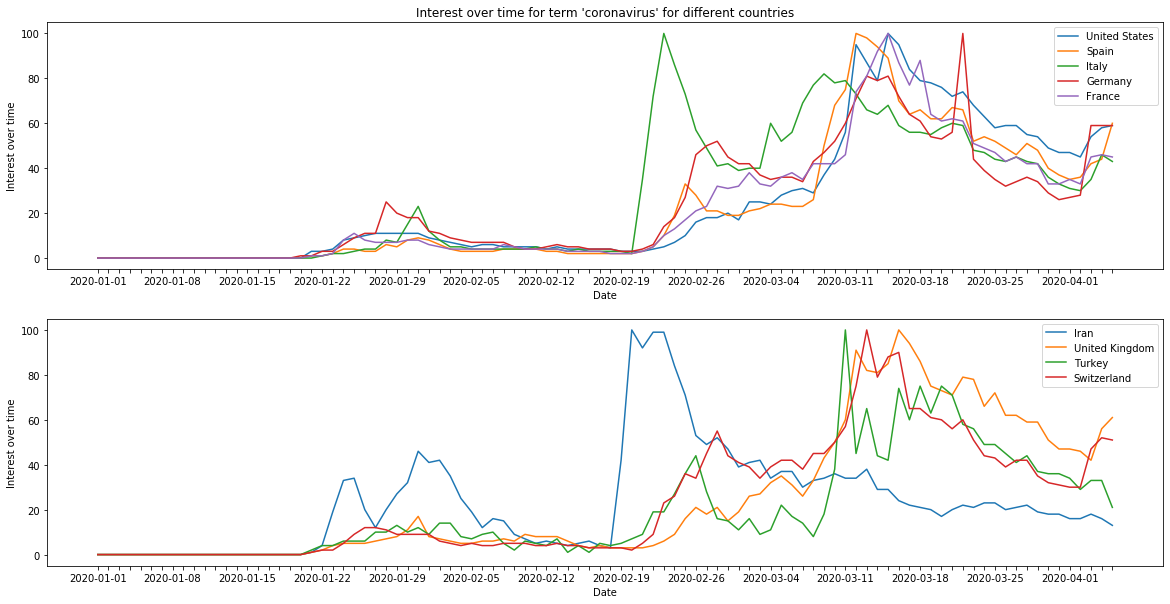

In [3]:
dates = list(country_df[country_df['iso']=='US']['date'])
dates_ticks = [dates[i] if i % 7 == 0 else '' for i in range(len(dates))]

f, ax = plt.subplots(2,1, figsize=(20,10))

for country in country_iso[:5]:
    ax[0].plot(dates, country_df[country_df['iso']==country]['coronavirus'], label=iso2name[country])

    
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Interest over time')
ax[0].set_xticklabels(dates_ticks)
ax[0].legend()
ax[0].set_title('Interest over time for term \'coronavirus\' for different countries')


for country in country_iso[5:]:
    ax[1].plot(dates, country_df[country_df['iso']==country]['coronavirus'], label=iso2name[country])
    
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Interest over time')
ax[1].set_xticklabels(dates_ticks)
ax[1].legend()
plt.savefig("ggtrend_coronavirus_country.jpeg", dpi=200)


It is worth noticing that Google Trends only provide interest over time (a scale of 0-100) instead of the absolute value of search counts. The value is normalized by Google so that a value of 100 indicates the peak popularity for the term within the given period and a value of 50 indicates average popularity.

As we can see for each country in Figure, the search for 'coronavirus' would have a short spike and decrease after that peak. The spike would most likely due to the first few confirmed cases or death in the area. And search queries will decrease after the virus has already spread around the country so that the people get used to it. For example, the breakout of the virus in Italy and Iran is probably earlier than in other countries. The search for 'fever' has a similar trend as 'coronavirus', which means the search for symptoms could be useful to predict future cases. However, Turkey's 'fever' search remains to be at a high level, which potentially means that the virus is still very popular in the country.


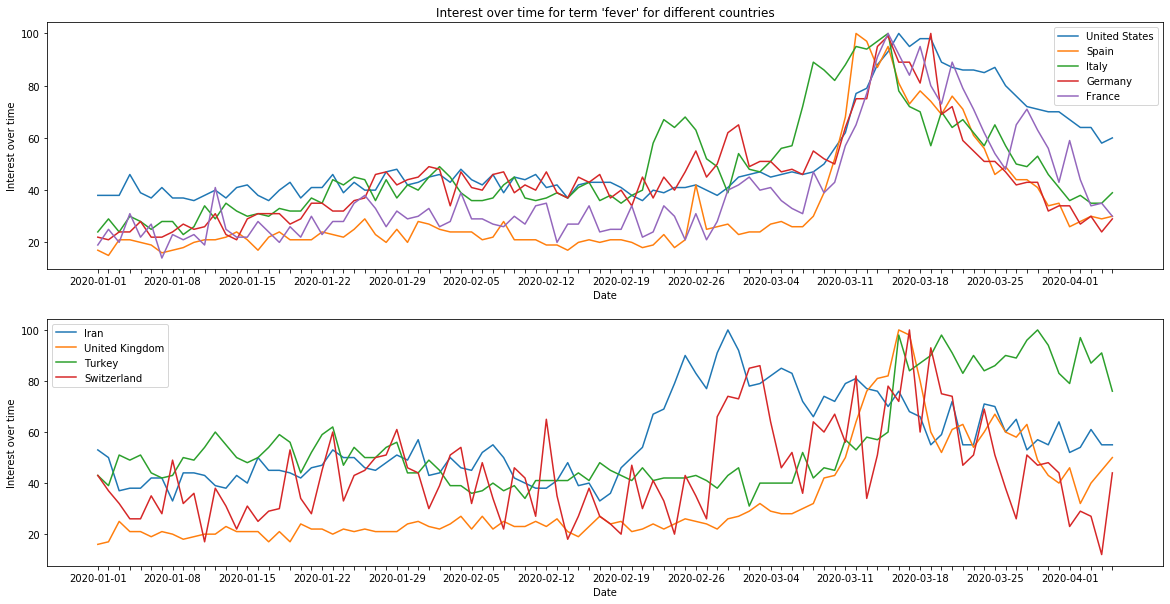

In [4]:
f, ax = plt.subplots(2,1, figsize=(20,10))

for country in country_iso[:5]:
    ax[0].plot(dates, country_df[country_df['iso']==country]['fever'], label=iso2name[country])
    
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Interest over time')
ax[0].set_xticklabels(dates_ticks)
ax[0].legend()
ax[0].set_title('Interest over time for term \'fever\' for different countries')


for country in country_iso[5:]:
    ax[1].plot(dates, country_df[country_df['iso']==country]['fever'], label=iso2name[country])
    
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Interest over time')
ax[1].set_xticklabels(dates_ticks)
ax[1].legend()
plt.savefig("ggtrend_fever_country.jpeg", dpi=200)



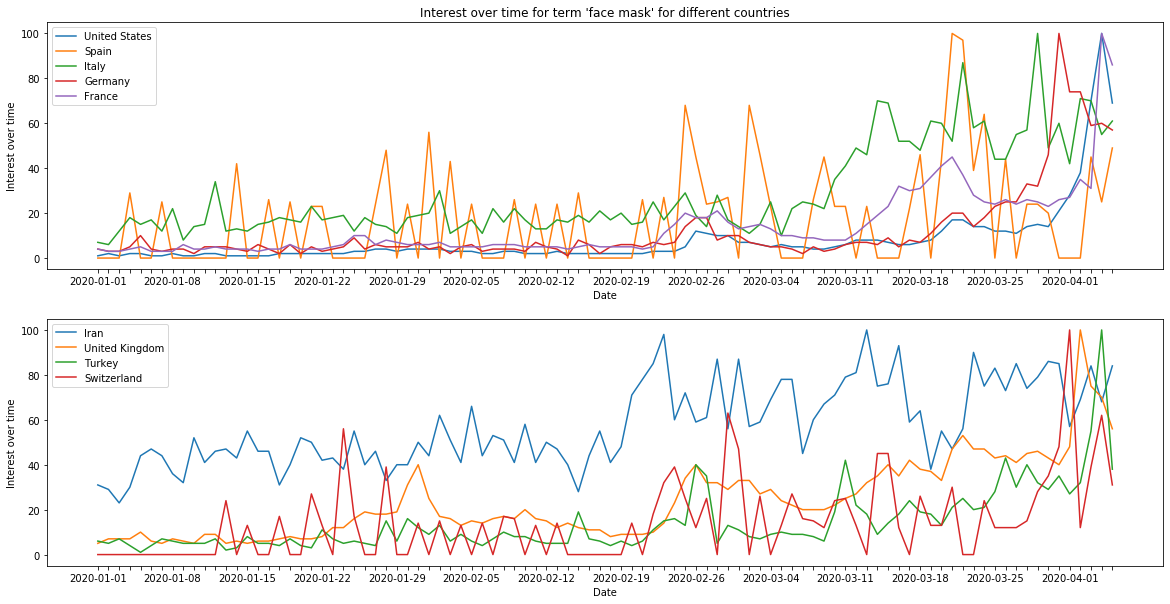

In [5]:
f, ax = plt.subplots(2,1, figsize=(20,10))

for country in country_iso[:5]:
    ax[0].plot(dates, country_df[country_df['iso']==country]['face mask'], label=iso2name[country])
    
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Interest over time')
ax[0].set_xticklabels(dates_ticks)
ax[0].legend()
ax[0].set_title('Interest over time for term \'face mask\' for different countries')


for country in country_iso[5:]:
    ax[1].plot(dates, country_df[country_df['iso']==country]['face mask'], label=iso2name[country])
    
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Interest over time')
ax[1].set_xticklabels(dates_ticks)
ax[1].legend()
plt.savefig("ggtrend_face_mask_country.jpeg", dpi=200)


The trend for the search 'face mask' appears to be different across countries due to the publicity of governments since people would follow the suggestion of government. For example, the people in the US only show interest in face mask after April because the CDC advises them to wear a face mask. The data points of Iran is probably an outlier because of its custom. Since the trend for 'face mask' is much nosier than other terms, we would probably not included it in the prediction.


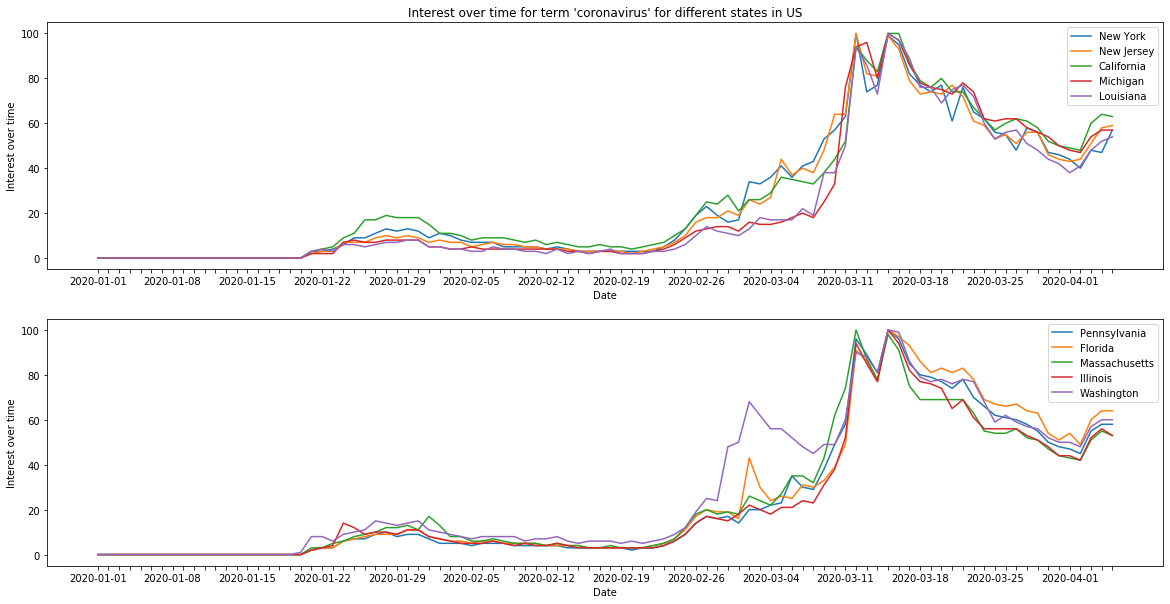

In [6]:
us_regions = list(region_df[region_df['iso']=='US']['geoName'].unique())

selected_regions1 = ['New York', 'New Jersey', 'California', 'Michigan', 'Louisiana']

selected_regions2 = ['Pennsylvania', 'Florida', 'Massachusetts', 'Illinois', 'Washington']

f, ax = plt.subplots(2,1, figsize=(20,10))

for region in selected_regions1:
    ax[0].plot(dates, region_df[region_df['geoName']==region]['coronavirus'], label=region)
    
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Interest over time')
ax[0].set_xticklabels(dates_ticks)
ax[0].legend()
ax[0].set_title('Interest over time for term \'coronavirus\' for different states in US')


for region in selected_regions2:
    ax[1].plot(dates, region_df[region_df['geoName']==region]['coronavirus'], label=region)
    
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Interest over time')
ax[1].set_xticklabels(dates_ticks)
ax[1].legend()
plt.savefig("ggtrend_coronavirus_state.jpeg", dpi=200)


The search trend in different regions within the same country roughly follows the same trends with only small variations. For example, Washington and Califonia have a small spike in late February since the virus first spreads in these areas.


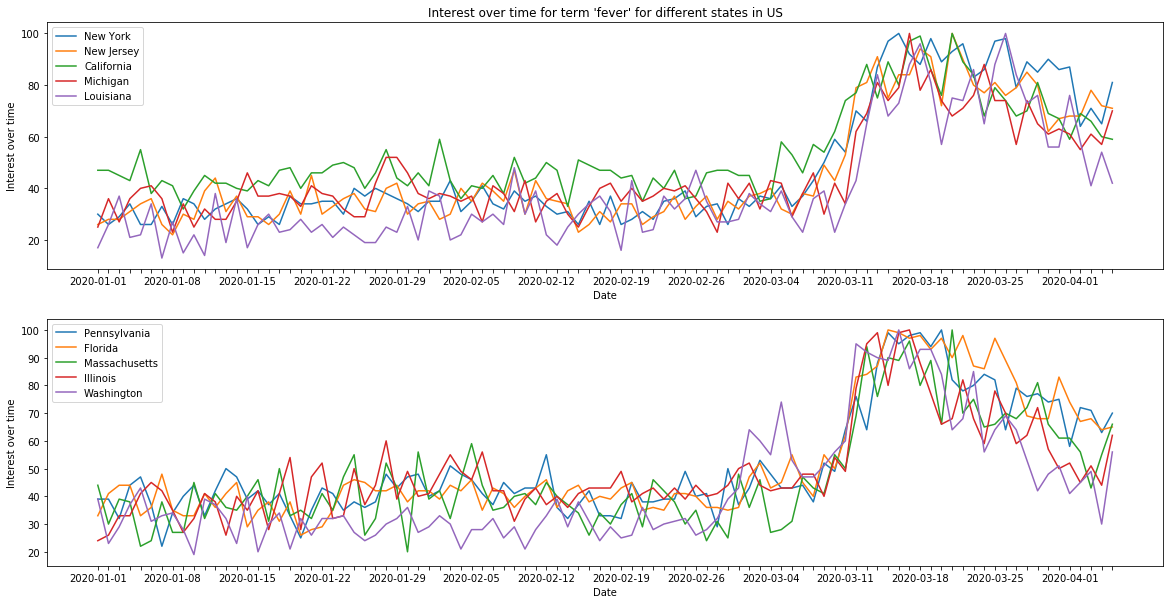

In [7]:
f, ax = plt.subplots(2,1, figsize=(20,10))

for region in selected_regions1:
    ax[0].plot(dates, region_df[region_df['geoName']==region]['fever'], label=region)
    
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Interest over time')
ax[0].set_xticklabels(dates_ticks)
ax[0].legend()
ax[0].set_title('Interest over time for term \'fever\' for different states in US')


for region in selected_regions2:
    ax[1].plot(dates, region_df[region_df['geoName']==region]['fever'], label=region)
    
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Interest over time')
ax[1].set_xticklabels(dates_ticks)
ax[1].legend()
plt.savefig("ggtrend_fever_state.jpeg", dpi=200)
